In [88]:
from api_key import *
import numpy as np
import pandas as pd
import json
import os
import time
import networkx as nx
import matplotlib.pyplot as plt #plotting
%matplotlib inline

In [66]:
from pyechonest import config
#config.ECHO_NEST_API_KEY = api_key_1
config.ECHO_NEST_API_KEY = api_key_2
#config.ECHO_NEST_API_KEY = api_key_3

In [52]:
from pyechonest import artist 

In [4]:
top100 = pd.read_csv('similar_artists_top_50.csv', encoding="iso-8859-9", nrows=100)

In [28]:
artist_edge = pd.DataFrame(np.zeros(10000).reshape(100,100))

In [74]:
list(top100['artist'])

[u'Justin Bieber',
 u'Kygo',
 u'One Direction',
 u'Lost Frequencies',
 u'Calvin Harris',
 u'Taylor Swift',
 u'Ellie Goulding',
 u'Robin Schulz',
 u'Drake',
 u'Meghan Trainor',
 u'David Guetta',
 u'Sam Smith',
 u'Major Lazer',
 u'Zara Larsson',
 u'Avicii',
 u'Ed Sheeran',
 u'Omi',
 u'The Weeknd',
 u'Felix Jaehn',
 u'Sia',
 u'Shawn Mendes',
 u'Hozier',
 u'Pharrell Williams',
 u'Ma\xeetre Gims',
 u'James Bay',
 u'Madcon',
 u'Jess Glynne',
 u'Coldplay',
 u'Maroon 5',
 u'Rudimental',
 u'5 Seconds Of Summer',
 u'Jason Der\xfclo',
 u'Ariana Grande',
 u'Disclosure',
 u'Naughty Boy',
 u'Tove Lo',
 u'Diplo',
 u'Selena Gomez',
 u'Macklemore & Ryan Lewis',
 u'Rihanna',
 u'Imagine Dragons',
 u'Nico & Vinz',
 u'Rachel Platten',
 u'The Avener',
 u'Wiz Khalifa',
 u'Flo Rida',
 u'Sam Hunt',
 u'John Legend',
 u'Little Mix',
 u'Zedd',
 u'Magic!',
 u'Hardwell',
 u'Dimitri Vegas',
 u'Nick Jonas',
 u'Klingande',
 u'Ti\xebsto',
 u'Skrillex',
 u'Walk the Moon',
 u'Florence + The Machine',
 u'Demi Lovato',
 u'

In [67]:
star = '*'*10
for i in range(len(top100)):
    sim_list = [singer.name for singer in artist.Artist(top100.iloc[i]['artist']).similar[:100]]
    for j in range(len(top100)):
        if (i!=j)and(top100.iloc[j]['artist'] in sim_list):
            artist_edge.iloc[i][j] = 1
    if ((i+1)%30==0):
        time.sleep(30)
    print('{0} {1}|{2} {3}'.encode("iso-8859-9").format(star, i+1, artist.Artist(top100.iloc[i]['artist']), star))

********** 1|Justin Bieber **********
********** 2|Kygo **********
********** 3|One Direction **********
********** 4|Lost Frequencies **********
********** 5|Calvin Harris **********
********** 6|Taylor Swift **********
********** 7|Ellie Goulding **********
********** 8|Robin Schulz **********
********** 9|Drake **********
********** 10|Meghan Trainor **********
********** 11|David Guetta **********
********** 12|Sam Smith **********
********** 13|Major Lazer **********
********** 14|Zara Larsson **********
********** 15|Avicii **********
********** 16|Ed Sheeran **********
********** 17|Omi **********
********** 18|The Weeknd **********
********** 19|Felix Jaehn **********
********** 20|Sia **********
********** 21|Shawn Mendes **********
********** 22|Hozier **********
********** 23|Pharrell Williams **********
********** 24|Maître Gims **********
********** 25|James Bay **********
********** 26|Madcon **********
********** 27|Jess Glynne **********
********** 28|Coldplay *********

In [83]:
artist_edge.index=list(top100['artist'])
artist_edge.columns=list(top100['artist'])
print artist_edge

                     Justin Bieber  Kygo  One Direction  Lost Frequencies  \
Justin Bieber                    0     0              0                 0   
Kygo                             0     0              0                 1   
One Direction                    0     0              0                 0   
Lost Frequencies                 0     0              0                 0   
Calvin Harris                    0     0              0                 0   
Taylor Swift                     0     0              0                 0   
Ellie Goulding                   0     0              0                 0   
Robin Schulz                     0     0              0                 0   
Drake                            0     0              0                 0   
Meghan Trainor                   0     0              0                 0   
David Guetta                     0     0              0                 0   
Sam Smith                        0     0              0                 0   

In [84]:
artist_graph = nx.DiGraph()
artist_list = list(top100['artist'])
artist_graph.add_nodes_from(artist_list)

In [85]:
for i in range(len(top100)):
    for j in range(len(top100)):
        if artist_edge.iloc[i][j]==1:
            artist_graph.add_edge(artist_list[i],artist_list[j])

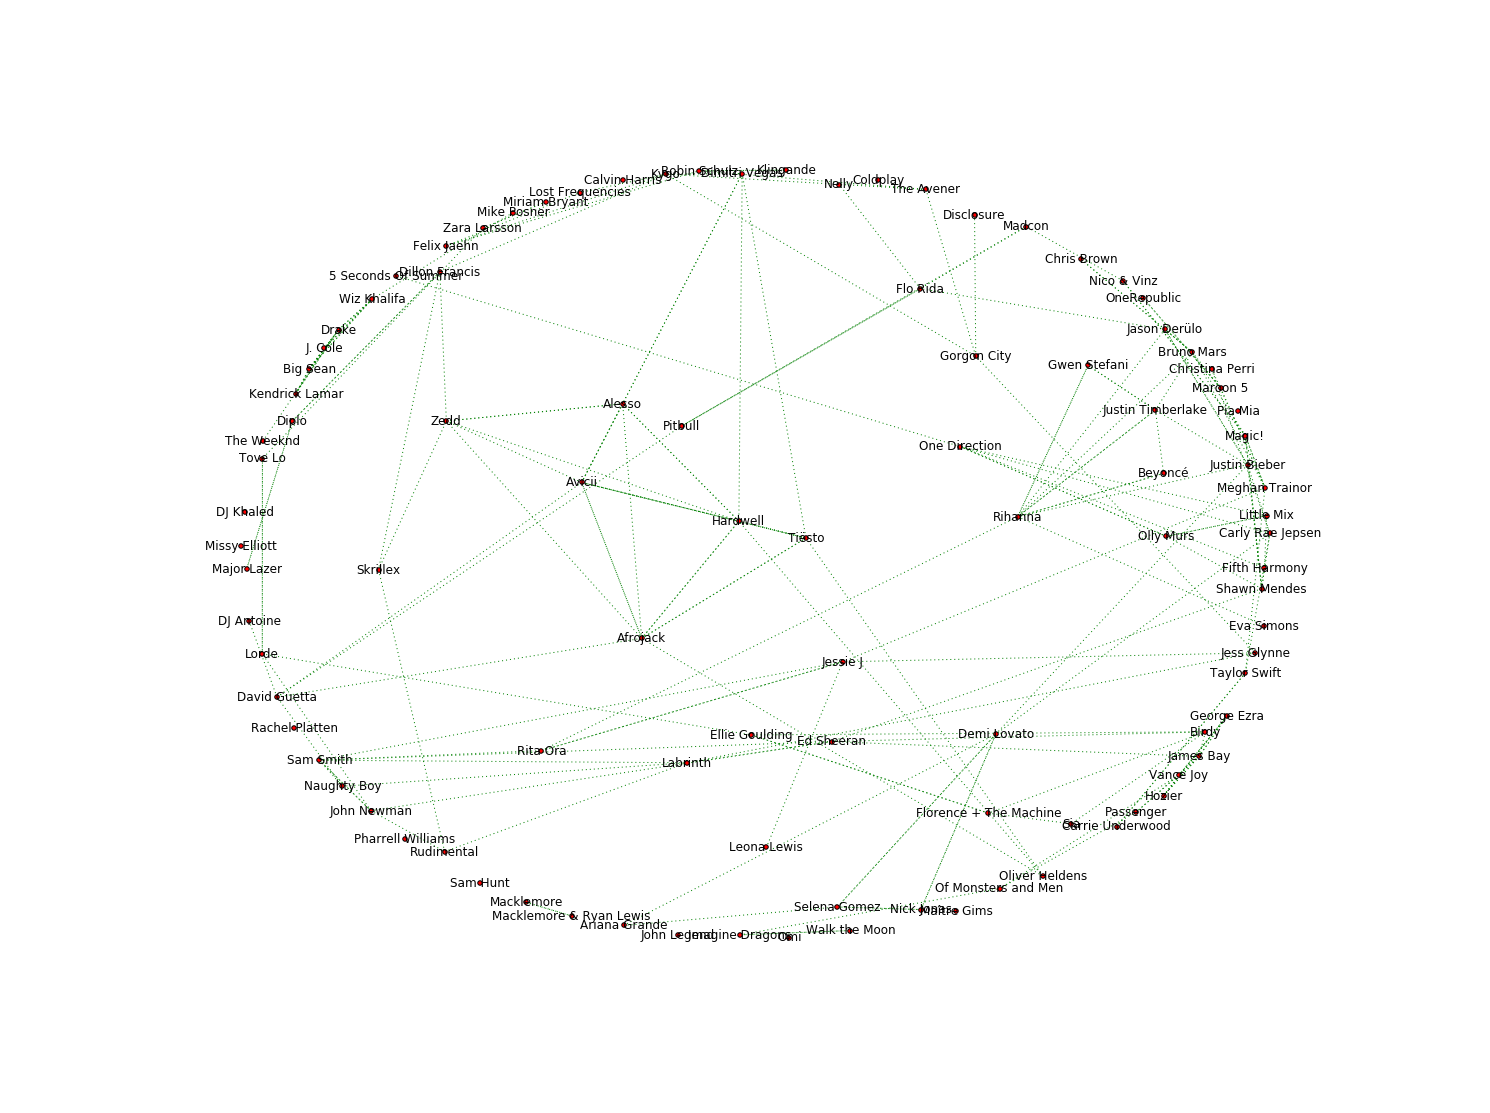

In [115]:
plt.figure(figsize = (20,15))
nx.draw(artist_graph,with_labels=True,arrows=False,node_size=20,style='dotted',edge_color='green')

In [98]:
A = "Afrojack"
B = "David Guetta"
li = [singer.name for singer in artist.Artist(A).similar[:200]]

In [99]:
B in li

False

In [100]:
artist.Artist(A).hotttnesss

0.812601

In [106]:
artist.Artist(C).hotttnesss

0.833238

So the similar singer is not ranked on their hotness.

In [112]:
J = "Justin Bieber"
[singer.hotttnesss for singer in artist.Artist(J).similar[:100]]

[0.610544,
 0.849763,
 0.850842,
 0.878934,
 0.60728,
 0.611233,
 0.784894,
 0.595793,
 0.825758,
 0.769736,
 0.815012,
 0.776296,
 0.838365,
 0.879755,
 0.882608]

In [111]:
artist.Artist(J).similar[:100]

[<artist - Cody Simpson>,
 <artist - Jason Derülo>,
 <artist - Demi Lovato>,
 <artist - Rihanna>,
 <artist - Jesse McCartney>,
 <artist - Conor Maynard>,
 <artist - Selena Gomez & The Scene>,
 <artist - Big Time Rush>,
 <artist - Justin Timberlake>,
 <artist - Miley Cyrus>,
 <artist - Bruno Mars>,
 <artist - JoJo>,
 <artist - Chris Brown>,
 <artist - Ariana Grande>,
 <artist - Selena Gomez>]

In [118]:
total_singer = pd.read_csv('similar_artists_top_50.csv', encoding="iso-8859-9")

In [121]:
ln = len(total_singer)
total_artist_edge = pd.DataFrame(np.zeros(ln**2).reshape(ln,ln))

In [124]:
star = '*'*10

for i in range(ln):
    sim_list = [singer.name for singer in artist.Artist(total_singer.iloc[i]['artist']).similar[:100]]
    for j in range(ln):
        if (i!=j)and(total_singer.iloc[j]['artist'] in sim_list):
            total_artist_edge.iloc[i][j] = 1
    if ((i+1)%30==0):
        time.sleep(60)
    print('{0} {1}|{2} {3}'.encode("iso-8859-9").format(star, i+1, artist.Artist(total_singer.iloc[i]['artist']), star))

********** 1|Justin Bieber **********
********** 2|Kygo **********
********** 3|One Direction **********
********** 4|Lost Frequencies **********
********** 5|Calvin Harris **********
********** 6|Taylor Swift **********
********** 7|Ellie Goulding **********
********** 8|Robin Schulz **********
********** 9|Drake **********
********** 10|Meghan Trainor **********
********** 11|David Guetta **********
********** 12|Sam Smith **********
********** 13|Major Lazer **********
********** 14|Zara Larsson **********
********** 15|Avicii **********
********** 16|Ed Sheeran **********
********** 17|Omi **********
********** 18|The Weeknd **********
********** 19|Felix Jaehn **********
********** 20|Sia **********
********** 21|Shawn Mendes **********
********** 22|Hozier **********
********** 23|Pharrell Williams **********
********** 24|Maître Gims **********
********** 25|James Bay **********
********** 26|Madcon **********
********** 27|Jess Glynne **********
********** 28|Coldplay *********

In [125]:
total_artist_graph = nx.DiGraph()
total_artist_list = list(total_singer['artist'])
total_artist_graph.add_nodes_from(total_artist_list)

In [126]:
for i in range(ln):
    for j in range(ln):
        if total_artist_edge.iloc[i][j]==1:
            total_artist_graph.add_edge(total_artist_list[i],total_artist_list[j])

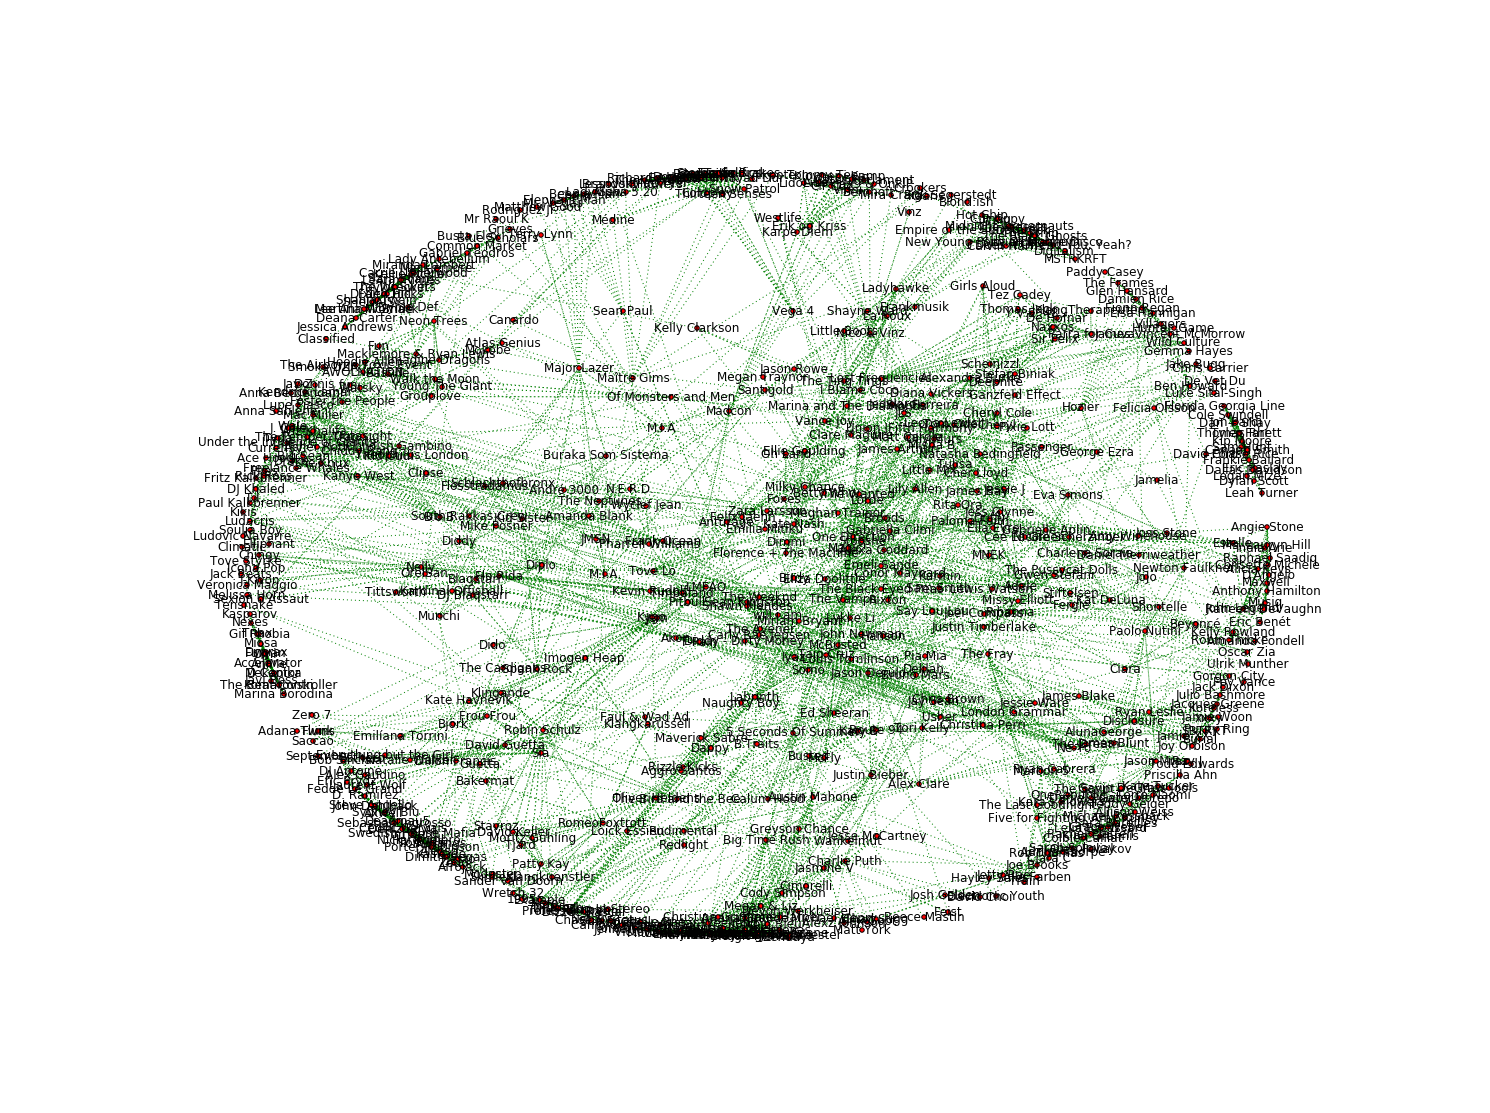

In [128]:
plt.figure(figsize = (20,15))
nx.draw(total_artist_graph,with_labels=True,arrows=False,node_size=20,style='dotted',edge_color='green')